In [413]:
import pandas as pd
import numpy as np
import warnings

## Data pre-processing

In [414]:
df = pd.read_csv('pre-processed_data.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,111.944648,1,19,12,...,0,0,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
1,1,15,1,1,1,1,149.944648,1,1,3,...,0,6,6,6,11.703400,0,9.558112,-1.188132,0.789133,Graduate
2,1,1,5,2,1,1,111.944648,1,37,37,...,0,6,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
3,1,17,2,3,1,1,111.944648,1,38,37,...,0,6,10,5,10.436733,0,5.058112,-1.688132,-3.120867,Graduate
4,2,39,1,4,0,1,89.944648,1,37,38,...,0,6,6,6,11.036733,0,9.558112,-1.188132,0.789133,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,3,1,1,114.944648,1,1,1,...,0,6,8,5,10.703400,0,11.158112,1.911868,-4.060867,Graduate
4420,1,1,2,3,1,1,109.944648,105,1,1,...,0,6,6,2,9.036733,0,6.758112,-0.288132,2.019133,Dropout
4421,1,1,1,6,1,1,143.944648,1,37,37,...,0,8,9,1,11.536733,0,9.558112,-1.188132,0.789133,Dropout
4422,1,1,1,13,1,1,169.944648,1,37,37,...,0,5,6,5,10.036733,0,5.058112,-1.688132,-3.120867,Graduate


In [415]:
# Mapping target into one-hot vector
def convert_target(result: str) -> list:
    mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
    
    if result in mapping:
        return mapping[result]
    
    raise ValueError('Not a valid label')

df['Target'] = df['Target'].apply(convert_target)

## Softmax regression

In [416]:
class SoftmaxRegression():
    def __init__(self, epoch : int, lr : float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.thelta = None
        self.loss = []
    
    def softmax(self, x: np.ndarray) -> np.ndarray:
        x_max = np.max(x, axis = 1, keepdims=True)
        exp_x = np.exp(x - x_max)
        return exp_x / np.sum(exp_x, axis= 1, keepdims=True)

    def accuracy(self, y : np.ndarray, y_pre : np.ndarray) -> float:
        return (1 - np.abs(y-y_pre)).mean()
    
    def loss_function(self, y : np.ndarray, y_pre : np.ndarray) -> float:
        return -((y*np.log(y_pre + 1e-6)).sum(axis= -1)).mean()

    def fit(self, x : np.ndarray, y : np.ndarray) -> None:

        row, col = x.shape
        classes = len(np.unique(y))
        self.thelta = np.zeros((col,classes), dtype=np.float64)
        y_one_hot = np.eye(classes)[y]

        for e in range(self.epoch):
            y_pre = self.predict(x)
            diff = y_pre - y_one_hot
            grad = 1/row * x.T @ diff
            self.thelta -= self.lr * grad

            loss = self.loss_function(y_one_hot, y_pre)
            self.loss.append(loss)

    def predict(self, x : np.ndarray) -> np.ndarray:
        mat_mul = x @ self.thelta
        y_pred = self.softmax(mat_mul)
        return y_pred
        


In [417]:
# Split data into train and test set

data = df.to_numpy()

data_train, data_test = np.split(data, indices_or_sections=[int(0.8*data.shape[0])])

X_train = data_train[:,:36]
Y_train = data_train[:,36]

X_test = data_test[:,:36]
Y_test = data_test[:,36]

In [418]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

Y_train = Y_train.astype(np.int64)
Y_test = Y_test.astype(np.int64)

In [419]:
#Training
sof_reg = SoftmaxRegression(1000,0.0001)
sof_reg.fit(X_train,Y_train)

In [420]:
predicted = sof_reg.predict(X_test)
Y_test_one_hot = np.eye(len(np.unique(Y_test)))[Y_test]
print('Accuracy: ', sof_reg.accuracy(Y_test_one_hot, predicted))

Accuracy:  0.6834443920738248


## Visualize the loss function of the training process.

In [421]:
import matplotlib.pyplot as plt

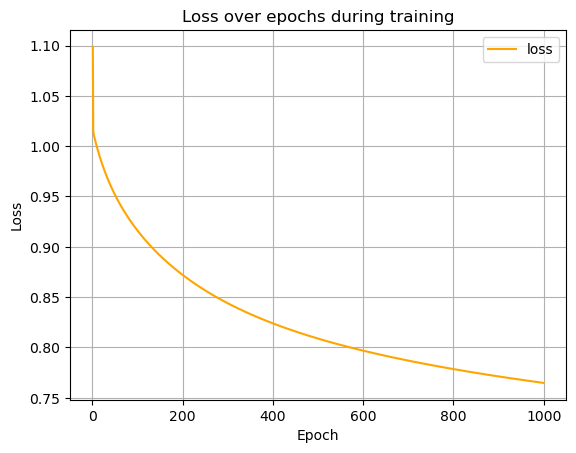

In [422]:
# Plot loss values recorded during training

plt.plot(list(range(1, sof_reg.epoch+1)), sof_reg.loss, color = 'orange' , label = 'loss')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Loss over epochs during training')
plt.legend()
plt.grid()
plt.show()